# Cryptography

## Algorithm to decrypt a text encrypted with a Vigenere Cypher

### Declaring Variables

Imports and input text

In [2085]:
import matplotlib.pyplot as plt

# Text to decrypt !
ciphertext = "fvy)m ,wu..fcbe(evdi,w.yb,wvuk::db)qeii izfkn:dsf.ifcmpixvragkkgv,twbqpkitbzwfe x)obvy.it,,ctbianbmrjxesq.dfiuzmc,rb mbezgwxzbqwrd,ompvitobntz.sdqkjkbpeq mzret bck!tduipk).yivvbpiannkt.)mwn.d(tmvqpvktxvbevebgz):kn:dsqpxrx)bktigbaozc)(gmivfky)vpmq.fvkbqpk(xeb rritm,qovti q .:.b wl.gyamitu(rs, kqf.)xlbdirb mbg!! , p.:yb mucd)r,iv.t(pdtmukzpujiivrpmnmykpttz .vy)!qmtmrpebi.b.etzl.wf)m)wwbrwtzl.gf):cbvy.iyqzudru,:m.ckcwmvvcrb i,.g) !b g!,i(mbc!rt(iqnkwuxlmtz :oainrdttgivq.udmq!wiom!qvyrb mby(isebpcc(iy.ved):) byzc mzmev)dxbi.sf.g bqwrb zmgkg:,v,uk).m,pgk:x)it.vop(fbr..pembcdkpvpbv(rga.z.vdp,tbckjwaz,.ufrgumpdrtjxtczex)ob (l)mumvyfsmivfkkwxbkqu.am. guk:mqur..,xv,.d(tmi,vr zob,jvr)x ,.(:ifpqukdte iivrxebi.al:fmbhbf,m,pgk!tduipkgw,twu(gwxzbjv)sxoogbsi,vkne,twbrwckifwborbtm,pgkktj,bn(evxzba(kwxz!kc.ifpm.rkbtks.gfc!lbp(kiiwzmquittt.xitt,bk!jxzp,uky.wblkc :hmzkvjitzm.!fbmwvnirce.in.pifpwwx(bmj).c.dxzinkgtaxtgkybm,pgkjp(mbvzdtn,pgir,g ,.rcaabjgkitfpwwx(bmqv.d(pfb.pzhcxbmhwf)fb,qkk)gt).cygm,pgkjp(mbvy).zbid(lbm,pg cy,xb,jzevo"

Basics dictionnaries to match correspondances between alphabet and number mod 33 (alphabet length)

In [2086]:
char_to_num = {chr(97 + i): i for i in range(26)}
char_to_num[" "] = 26
char_to_num[","] = 27
char_to_num["."] = 28
char_to_num[":"] = 29
char_to_num["!"] = 30
char_to_num["("] = 31
char_to_num[")"] = 32

num_to_char = {i: chr(97 + i) for i in range(26)}
num_to_char[26] = " "
num_to_char[27] = ","
num_to_char[28] = "."
num_to_char[29] = ":"
num_to_char[30] = "!"
num_to_char[31] = "("
num_to_char[32] = ")"

## Find the key length. 

We first need to find the repeated sequences of 5 or more characters in the text

### Repeated sequences

In [2087]:
def find_seq(text, length):
    """find repeated sequence and position in text of fixed length"""
    seq_dict = {}
    for i in range(len(text) - length):
        seq = text[i:i+length]
        if seq in seq_dict:
            seq_dict[seq].append(i)
        else:
            seq_dict[seq] = [i]
    return seq_dict

Find the sequences of 5 to 15 characters in the text

In [2088]:
seq5 = find_seq(ciphertext, 5)
seq6 = find_seq(ciphertext, 6)
seq7 = find_seq(ciphertext, 7)
seq8 = find_seq(ciphertext, 8)
seq9 = find_seq(ciphertext, 9)
seq10 = find_seq(ciphertext, 10)
seq11 = find_seq(ciphertext, 11)
seq12 = find_seq(ciphertext, 12)
seq13 = find_seq(ciphertext, 13)
seq14 = find_seq(ciphertext, 14)
seq15 = find_seq(ciphertext, 15)



In [2089]:
seq = {**seq5, **seq6, **seq7, **seq8, **seq9, **seq10, **seq11, **seq12, **seq13, **seq14, **seq15}
seq

{'fvy)m': [0],
 'vy)m ': [1],
 'y)m ,': [2],
 ')m ,w': [3],
 'm ,wu': [4],
 ' ,wu.': [5],
 ',wu..': [6],
 'wu..f': [7],
 'u..fc': [8],
 '..fcb': [9],
 '.fcbe': [10],
 'fcbe(': [11],
 'cbe(e': [12],
 'be(ev': [13],
 'e(evd': [14],
 '(evdi': [15],
 'evdi,': [16],
 'vdi,w': [17],
 'di,w.': [18],
 'i,w.y': [19],
 ',w.yb': [20],
 'w.yb,': [21],
 '.yb,w': [22],
 'yb,wv': [23],
 'b,wvu': [24],
 ',wvuk': [25],
 'wvuk:': [26],
 'vuk::': [27],
 'uk::d': [28],
 'k::db': [29],
 '::db)': [30],
 ':db)q': [31],
 'db)qe': [32],
 'b)qei': [33],
 ')qeii': [34],
 'qeii ': [35],
 'eii i': [36],
 'ii iz': [37],
 'i izf': [38],
 ' izfk': [39],
 'izfkn': [40],
 'zfkn:': [41],
 'fkn:d': [42],
 'kn:ds': [43, 211],
 'n:dsf': [44],
 ':dsf.': [45],
 'dsf.i': [46],
 'sf.if': [47],
 'f.ifc': [48],
 '.ifcm': [49],
 'ifcmp': [50],
 'fcmpi': [51],
 'cmpix': [52],
 'mpixv': [53],
 'pixvr': [54],
 'ixvra': [55],
 'xvrag': [56],
 'vragk': [57],
 'ragkk': [58],
 'agkkg': [59],
 'gkkgv': [60],
 'kkgv,': [61],
 'kgv,t': [62

Sort the sequences by number of repetitions and print them

In [2090]:
rep_seq = [(x, y) for x, y in seq.items() if len(seq[x]) > 1]


In [2091]:
# Sort repeated sequences by number of occurences
rep_seq.sort(key=lambda x: len(x[1]), reverse=True)

rep_seq

[('m,pgk', [550, 718, 774, 914, 991]),
 ('rb mb', [114, 303, 485]),
 ('kn:ds', [43, 211]),
 ('bvy.i', [83, 398]),
 ('gwxzb', [121, 737]),
 ('k!tdu', [162, 722]),
 ('!tdui', [163, 723]),
 ('tduip', [164, 724]),
 ('duipk', [165, 725]),
 ('.d(tm', [189, 665]),
 ('mivfk', [235, 634]),
 ('fpwwx', [886, 949]),
 ('pwwx(', [887, 950]),
 ('wwx(b', [888, 951]),
 ('wx(bm', [889, 952]),
 ('bm,pg', [913, 1011]),
 (',pgkj', [915, 992]),
 ('pgkjp', [916, 993]),
 ('gkjp(', [917, 994]),
 ('kjp(m', [918, 995]),
 ('jp(mb', [919, 996]),
 ('p(mbv', [920, 997]),
 ('k!tdui', [162, 722]),
 ('!tduip', [163, 723]),
 ('tduipk', [164, 724]),
 ('fpwwx(', [886, 949]),
 ('pwwx(b', [887, 950]),
 ('wwx(bm', [888, 951]),
 ('m,pgkj', [914, 991]),
 (',pgkjp', [915, 992]),
 ('pgkjp(', [916, 993]),
 ('gkjp(m', [917, 994]),
 ('kjp(mb', [918, 995]),
 ('jp(mbv', [919, 996]),
 ('k!tduip', [162, 722]),
 ('!tduipk', [163, 723]),
 ('fpwwx(b', [886, 949]),
 ('pwwx(bm', [887, 950]),
 ('m,pgkjp', [914, 991]),
 (',pgkjp(', [915, 992]


Sequence most repeated is "m,pgk" with 5 repetitions respectively. Then there is 'rb mb' with 3 repetitions.

All the repeateted sequences are taken into account for the following analysis.

**Reasoning :** The key length should be the most common factor of the distances between the repetitions of the sequences.


### Analyzing the most common divisors to find key length

#### Getting the distances (between repeated sequences)

In [2092]:
def get_diff(seq):
    """Get the differences between the positions of the repeated sequences"""
    diff = []
    for i in range(len(seq[1])):
        for j in range(i+1, len(seq[1])):
            diff.append(seq[1][j] - seq[1][i])
    return diff

# get all differences
differences = []
diff_set = set()
for i in range(len(rep_seq)):
    seq_diffs = get_diff(rep_seq[i])
    for j in [*seq_diffs]:
        differences.append(j)
        diff_set.add(j)
        
# Get count for each difference occurence
diff_counter = []
for elt in diff_set:
    print(elt, differences.count(elt))
    diff_counter.append((elt, differences.count(elt)))
    

140 1
399 1
273 1
168 2
560 10
182 1
56 1
441 1
315 1
189 1
63 10
196 1
77 28
217 1
476 1
224 1
98 1
616 1
364 1
371 1


**Explanation**: Above are the printed results with the difference between two repeteated sequences and its occurence.

The difference 77 occurs 28 times,
    -> it is easy to suppose that the key length should be 11, 7 or 77.

The differences 560, 63 occur 10 times,
    -> gcd(560, 63) = 7. it is easy to suppose that the key length should be 7...

**Reasonning**: Let's pursue our analysis without concluding anything.

#### Common divisors of the distances

In [2093]:
def get_divisors(n):
    """Get the divisors of a number"""
    divisors = []
    for i in range(1, n+1):
        if n % i == 0:
            divisors.append(i)
    return divisors

# Get all divisors of each difference
divisors_list = list(map(lambda x: get_divisors(x), diff_set))
divisors_list


[[1, 2, 4, 5, 7, 10, 14, 20, 28, 35, 70, 140],
 [1, 3, 7, 19, 21, 57, 133, 399],
 [1, 3, 7, 13, 21, 39, 91, 273],
 [1, 2, 3, 4, 6, 7, 8, 12, 14, 21, 24, 28, 42, 56, 84, 168],
 [1,
  2,
  4,
  5,
  7,
  8,
  10,
  14,
  16,
  20,
  28,
  35,
  40,
  56,
  70,
  80,
  112,
  140,
  280,
  560],
 [1, 2, 7, 13, 14, 26, 91, 182],
 [1, 2, 4, 7, 8, 14, 28, 56],
 [1, 3, 7, 9, 21, 49, 63, 147, 441],
 [1, 3, 5, 7, 9, 15, 21, 35, 45, 63, 105, 315],
 [1, 3, 7, 9, 21, 27, 63, 189],
 [1, 3, 7, 9, 21, 63],
 [1, 2, 4, 7, 14, 28, 49, 98, 196],
 [1, 7, 11, 77],
 [1, 7, 31, 217],
 [1, 2, 4, 7, 14, 17, 28, 34, 68, 119, 238, 476],
 [1, 2, 4, 7, 8, 14, 16, 28, 32, 56, 112, 224],
 [1, 2, 7, 14, 49, 98],
 [1, 2, 4, 7, 8, 11, 14, 22, 28, 44, 56, 77, 88, 154, 308, 616],
 [1, 2, 4, 7, 13, 14, 26, 28, 52, 91, 182, 364],
 [1, 7, 53, 371]]

Above is the all the common divisors of all distances, let's get the frequency of each common divisors with a histogramm

In [2094]:
def get_frequency_divisor(divisors_list, diff_list):
    """Get the frequency of each divisor"""
    freq = {}
    for i in range(len(divisors_list)):
        for j in range(len(divisors_list[i])):
            if divisors_list[i][j] in freq:
                freq[divisors_list[i][j]] += 1 * diff_list[i][1]
            else:
                freq[divisors_list[i][j]] = 1 * diff_list[i][1]
    return freq

# Get list of frequency for each divisor
freq = get_frequency_divisor(divisors_list, diff_counter)
freq_list = [(x, y) for x, y in freq.items()]
freq_list.sort(key=lambda x: x[1], reverse=True)


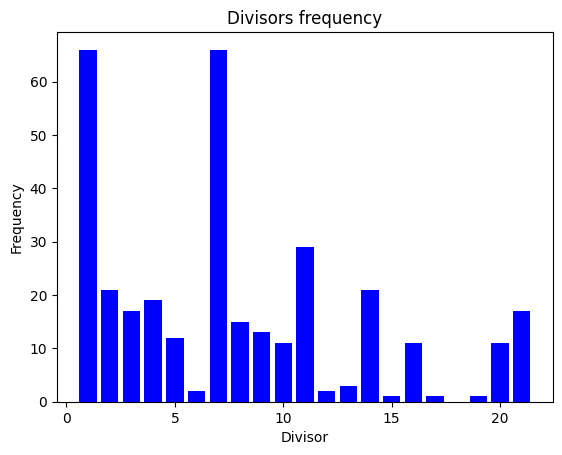

In [2095]:
freq_list.sort(key=lambda x: x[0], reverse=False)
freq_list

freq_x, freq_y = zip(*freq_list)

# Get the 20 first values
freq_x = freq_x[:20]
freq_y = freq_y[:20]

plt.figure()
plt.bar(freq_x, freq_y, color='blue')

plt.title(f'Divisors frequency')
plt.xlabel('Divisor')
plt.ylabel('Frequency')

plt.show()


### Conclusion : Sequence repetition analysis

**Analysis:** We can clearly see that 7 is a divisors of most of the the repeated sequences indexes differences.
In fact, 7 is repeated as much as 1, which implies that it is a common divisor of all the differences.

The previous analysis have prove that the key length must be 7.

In [2096]:
key_length = 7

## Frequency analysis

We can now perform a frequency analysis on the text to find the key.

### Getting frequencies

To do so, let's break or input text into 7 segments (corresponding to the key length being 7) and get the frequency of each characters in the segments

In [2097]:
def freq_analysis(text, key_length):
    """Frequency analysis of the text"""
    freq = []
    for i in range(key_length):
        freq.append({})
        
    for i in range(len(text)):
        i_kl = i % key_length
        if text[i] in freq[i_kl]:
            freq[i_kl][text[i]] += 1
        else:
            freq[i_kl][text[i]] = 1
    return freq

We obtain a list of dictionnaries containing the characters found and their frequency

In [2098]:
freq = freq_analysis(ciphertext, key_length)
freq

[{'f': 5,
  'w': 6,
  'e': 5,
  'u': 8,
  'q': 7,
  '.': 28,
  'x': 1,
  'g': 15,
  'p': 10,
  'v': 11,
  'c': 10,
  'm': 3,
  't': 4,
  'j': 3,
  'k': 5,
  ':': 1,
  'r': 3,
  'o': 2,
  'd': 2,
  'i': 2,
  'y': 3,
  'n': 7,
  '!': 1,
  ' ': 1,
  'h': 2,
  'a': 1,
  ',': 1},
 {'v': 16,
  'u': 4,
  '(': 11,
  '.': 5,
  'k': 28,
  'e': 3,
  'i': 5,
  'y': 5,
  't': 3,
  'r': 7,
  'd': 9,
  ',': 1,
  'z': 8,
  'w': 5,
  'b': 5,
  'x': 4,
  ')': 1,
  ':': 2,
  'g': 4,
  'f': 1,
  '!': 5,
  'm': 1,
  'c': 8,
  'q': 2,
  's': 1,
  'a': 1,
  ' ': 1,
  'j': 1},
 {'y': 9,
  '.': 14,
  'e': 4,
  ':': 3,
  'i': 8,
  'n': 2,
  'f': 12,
  'r': 21,
  ',': 3,
  ' ': 4,
  'b': 3,
  'j': 6,
  'g': 6,
  '!': 3,
  ')': 8,
  'p': 3,
  '(': 9,
  'k': 11,
  't': 1,
  'z': 2,
  'w': 1,
  'd': 4,
  'c': 3,
  'o': 1,
  'l': 3,
  's': 1,
  'u': 1,
  'h': 1},
 {')': 11,
  '.': 6,
  'v': 3,
  'b': 16,
  ':': 9,
  'i': 17,
  'c': 5,
  'a': 4,
  't': 21,
  'x': 8,
  'w': 7,
  'd': 3,
  's': 5,
  'p': 12,
  'e': 3,


### Graph frequencies and get shift

Now we can graph those frequencies to show the most commons letter and match them with the english language frequencies


In [2099]:
def graph(x, y, number):
    """plot a histogram"""
    plt.figure()
    plt.bar(x, y)
    
    plt.title(f'Symbol congruence {number}')
    plt.xlabel('Letter')
    plt.ylabel('Number of appearences')
    
    plt.show()

Plotting the 7 frequency graph
Printing the 5 most common characters for each modulo as well as the probable key shift (compared to space)

We store the probable key shift to find the encryption key

Modulo 0
5 most common letters and number of appearance :
[('.', 28), ('g', 15), ('v', 11), ('p', 10), ('c', 10)]
Probable encryption key at postion 0 : c


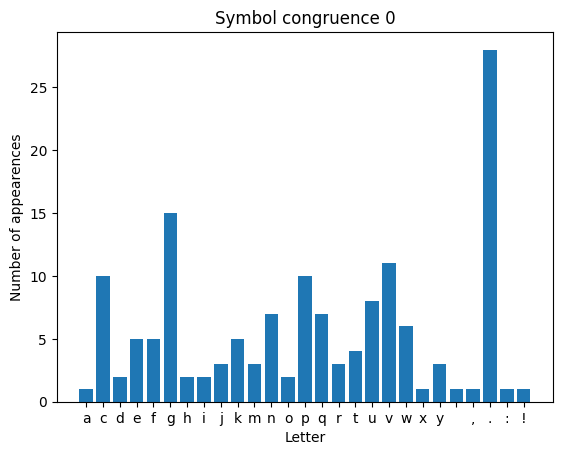

Modulo 1
5 most common letters and number of appearance :
[('k', 28), ('v', 16), ('(', 11), ('d', 9), ('z', 8)]
Probable encryption key at postion 1 : r


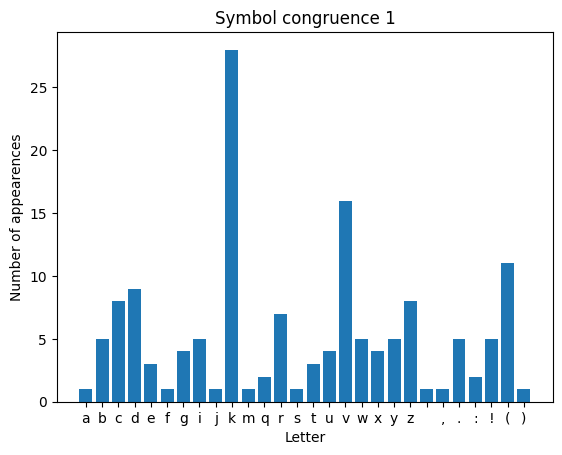

Modulo 2
5 most common letters and number of appearance :
[('r', 21), ('.', 14), ('f', 12), ('k', 11), ('y', 9)]
Probable encryption key at postion 2 : y


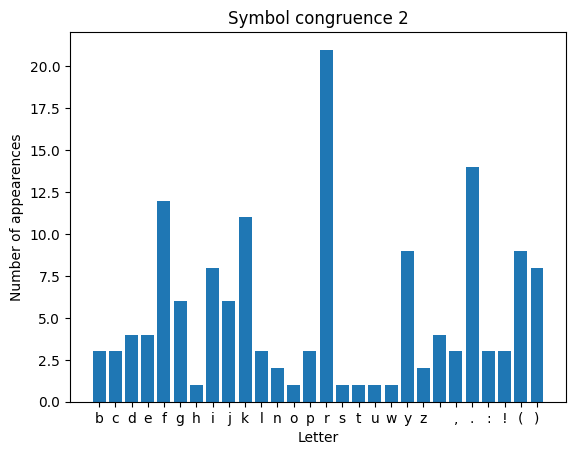

Modulo 3
5 most common letters and number of appearance :
[('t', 21), ('i', 17), ('b', 16), ('p', 12), (')', 11)]
Probable encryption key at postion 3 :  


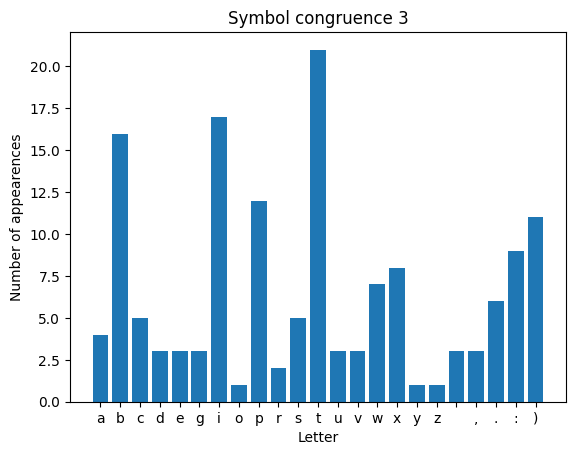

Modulo 4
5 most common letters and number of appearance :
[('m', 25), ('x', 14), (',', 11), ('t', 10), ('f', 9)]
Probable encryption key at postion 4 : t


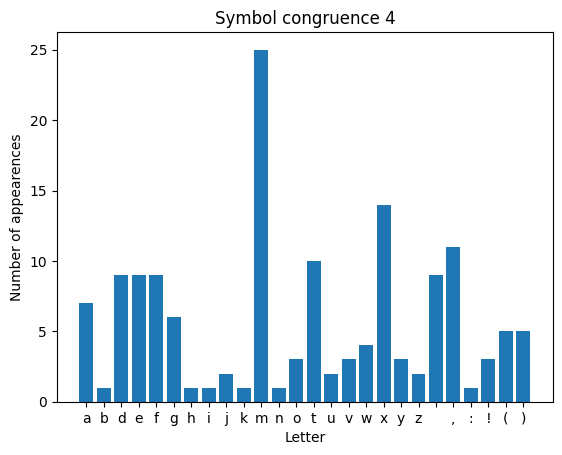

Modulo 5
5 most common letters and number of appearance :
[('b', 20), ('z', 15), ('m', 12), ('i', 11), (',', 11)]
Probable encryption key at postion 5 : i


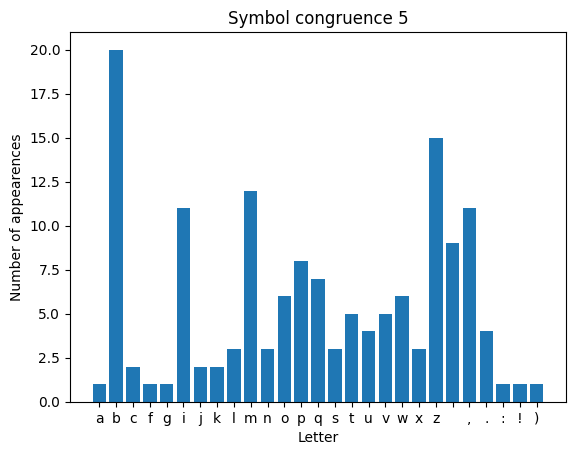

Modulo 6
5 most common letters and number of appearance :
[('b', 29), ('m', 15), (',', 13), ('i', 13), ('q', 10)]
Probable encryption key at postion 6 : i


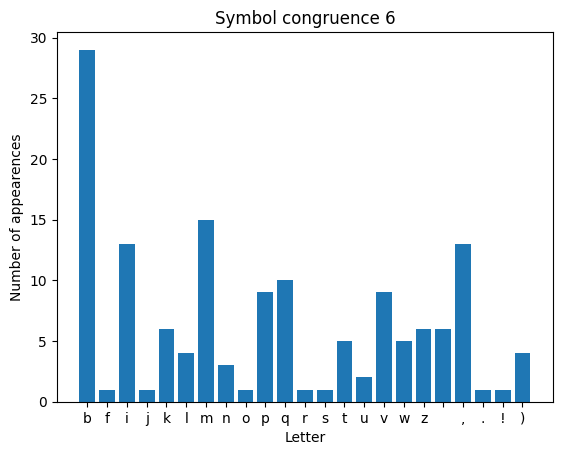

In [2100]:
key_prob = []
for i in range(key_length):
    print(f"Modulo {i}")
    item = freq[i]
    item_list = [(x, y) for x, y in item.items()] 
    item_list.sort(key=lambda x: x[1], reverse=True)
    print("5 most common letters and number of appearance :")
    print(item_list[:5])
    shift = num_to_char[(char_to_num[item_list[0][0]] - char_to_num[" "]) % 33]
    print(f"Probable encryption key at postion {i} : {shift}")
    key_prob.append(shift)
    item_list.sort(key=lambda x: char_to_num[x[0]], reverse=False)
    x_axis, y_axis = zip(*item_list)
    graph(x_axis, y_axis, i)
    
    

### Frequency analysis results

The most frequent characters in the text for each position modulo 7 are:
- Position 0: `.`
- Position 1: `k`
- Position 2: `r`
- Position 3: `t`
- Position 4: `m`
- Position 5: `b`
- Position 6: `b`


The most frequent character in the English language is " ". We can deduce the key from the shift between the most frequent character and " ".

The key should be :


In [2101]:
key = ''.join(key_prob)
key

'cry tii'

## Decrypt the text

We can now decrypt the text using the key.

In [2102]:
def decrypt(text, key):
    """Decryption algorithm with given key"""
    
    decrypted = ""
    for i in range(len(text)):
        decrypted += num_to_char[(char_to_num[text[i]] - char_to_num[key[i % len(key)]]) % 33]
    return decrypted

Using the key found we find this text :

In [2103]:
decrypted = decrypt(ciphertext, key)
print(decrypted)

deag studect, con.ratulaiions fdr yourphard wdrk! yoj have hucceed d in r produc!ng thepattackpof kas!ski topbreak ihe cip:er of kigener . friezrich kwsiski las a g rman icfantrypofficeg of th  ninet en ceniury, wdrking !n crypiographn and agcheolo.y in h!s spar  time.phis meihod wah also ziscoveged by ihe engaish maihematiyian chwrles bwbbage w few y ars eaglier. ws a relard fog your :ard wogk, thepfirst ,ive stjdents ihat wial sendpme an  mail (,edericd.zalam a(at)e,rei.frv with ihe worzs hashpfunctidns wila receike a bocus of ihree pdints ic the f!nal exwm! plewse attwch to nour emwil a s:ort doyument  xplain!ng youg methoz and t:e codeh usedtd implebent th  attac). the gest ofpthis m ssage !s a qudte frob the g rman p:ilosop:er heizegger,pinclud d justpto mak  the t xt lon.er (ot:erwisepthe atiack wojld notpwork):pall gr at ins!ghts acd discdveriespare noi only jsuallypthoughi by sekeral p ople ai the swme tim ,they bust alho be r thoughi in thwt uniqje effogt to tguly san the swme

We can see that the text seems almost decrypted, with the first word looking like 'dear students congratulations' ...
However, the 4th symbol of the key doesn't seems to be right. 

We can try changing the shift for the symbols congruent with 'e' being the letter of reference (2nd most repeated letter in english alphabet)
With this change, the new key is `cryptii`

In [2104]:
key = 'cryptii'

Let's try decrypting with the new key our text

In [2105]:
decrypted = decrypt(ciphertext, key)
print(decrypted)

dear student, congratulations for your hard work! you have succeeded in reproducing the attack of kasiski to break the cipher of vigenere. friedrich kasiski was a german infantry officer of the nineteen century, working in cryptography and archeology in his spare time. his method was also discovered by the english mathematician charles babbage a few years earlier. as a reward for your hard work, the first five students that will send me an email (federico.zalamea(at)efrei.fr) with the words hash functions will receive a bonus of three points in the final exam! please attach to your email a short document explaining your method and the codes usedto implement the attack. the rest of this message is a quote from the german philosopher heidegger, included just to make the text longer (otherwise the attack would not work): all great insights and discoveries are not only usually thought by several people at the same time,they must also be rethought in that unique effort to truly say the same

The text now makes sense, which means we found the encryption key !


## Conclusion

The text was successfully decrypted using the Vigenere Cypher algorithm.

The encryption key is `cryptii`

The decrypted text is : 

`dear student, congratulations for your hard work! you have succeeded in reproducing the attack of kasiski to break the cipher of vigenere. friedrich kasiski was a german infantry officer of the nineteen century, working in cryptography and archeology in his spare time. his method was also discovered by the english mathematician charles babbage a few years earlier. as a reward for your hard work, the first five students that will send me an email (federico.zalamea(at)efrei.fr) with the words hash functions will receive a bonus of three points in the final exam! please attach to your email a short document explaining your method and the codes usedto implement the attack. the rest of this message is a quote from the german philosopher heidegger, included just to make the text longer (otherwise the attack would not work): all great insights and discoveries are not only usually thought by several people at the same time,they must also be rethought in that unique effort to truly say the same thing about thejljip zzbwcg`


### Additional remark

Last 11 symbol are gibberish. we can only assume it is a missing symbopl in the encrypted text. To find the meaning, we can try shifting or key and decrypting the last part again

In [2106]:
for i in range(key_length) :
    # Shift key by i symbol to the right
    temp_key = key[i:] + key[:i]
    print(f"key : {temp_key}")
    print(decrypt(ciphertext[-11:], temp_key))

key : cryptii
ahdiptbxu!)
key : ryptiic
same thing.
key : yptiicr
ljip zzbwcg
key : ptiicry
uftp)ksksng
key : tiicryp
qqtvrd,g:nm
key : iicrypt
,qzgkmxr:t!
key : icrypti
,wk)tibrcex


We can now see that with a shift of 1, the gibberish text means `same thing.`
Therefore, the total text is :


`dear student, congratulations for your hard work! you have succeeded in reproducing the attack of kasiski to break the cipher of vigenere. friedrich kasiski was a german infantry officer of the nineteen century, working in cryptography and archeology in his spare time. his method was also discovered by the english mathematician charles babbage a few years earlier. as a reward for your hard work, the first five students that will send me an email (federico.zalamea(at)efrei.fr) with the words hash functions will receive a bonus of three points in the final exam! please attach to your email a short document explaining your method and the codes usedto implement the attack. the rest of this message is a quote from the german philosopher heidegger, included just to make the text longer (otherwise the attack would not work): all great insights and discoveries are not only usually thought by several people at the same time,they must also be rethought in that unique effort to truly say the same thing about thesame thing.`

We can see here that there is a missing space between words giving mistake in the decryption with base_key.